<a href="https://colab.research.google.com/github/Al1952/Final_Exam_Data_Analysis_with_Python/blob/master/Bean_Disease_Classifier_2_4_11_Question_ipynb_8_26_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [ ]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
#Will need the following imports to run the program

import os
import zipfile
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img



In [ ]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:05<00:00, 24.4MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:01<00:00, 16.8MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:01<00:00, 16.6MB/s]


In [ ]:
# Do not change this code
#  Only need this for the assignment--when I do it in real life, will use the method in below cells to import prepared Google datasets
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

In [ ]:
# Directory with our training BEAN pictures for assignment

beans_dir = os.path.join('/tmp/train')
# Directory with our validation bean pictures
validation_bean_dir = os.path.join('/tmp/validation')
# Directory with our test bean pictures
test_bean_dir = os.path.join('/tmp/test')



In [ ]:
#  This is how to load the Google prepared data in the real world--not for assignment
# This imports the data, already prepared and cleaned, directly from tfds Google datasets, and explains what's on it

#ds = tfds.load('beans', split='train', shuffle_files=True)
#assert isinstance(ds, tf.data.Dataset)

ds, info = tfds.load('beans', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

print (info)


tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='/root/tensorflow_datasets/beans/0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': <Spli

In [ ]:
# This code load a datasets and Only take a single example
# Shows the labels of the dataset

#ds = tfds.load('mnist', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  label = example["label"]
  print(image.shape, label)
  plt.show(example)

print()

for image, label in tfds.as_numpy(ds):
      print(type(image), type(label), label)

['image', 'label']
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)

<class 'str'> <class 'str'> label


,image,label
0,,1 (bean_rust)

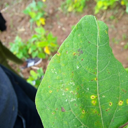

In [ ]:
# Show the images in the first 4 of the dataset

#  don't need this code line if I already ran it above
#ds, info = tfds.load('beans', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

In [ ]:
info.features
print()

# prints the # of groups of data--i.e., 3 types of bean pictures in the dataset
print(info.features["label"].num_classes)

# this gives the names of the groups
print(info.features["label"].names)


3
['angular_leaf_spot', 'bean_rust', 'healthy']


In [ ]:
#  Shapes of features

print(info.features.shape)
print(info.features.np_dtype)
print(info.features['image'].shape)
print(info.features['image'].np_dtype)
print()
print(list(info.splits.keys()))

print()

print(info.splits)

{'image': (500, 500, 3), 'label': ()}
{'image': <class 'numpy.uint8'>, 'label': <class 'numpy.int64'>}
(500, 500, 3)
<class 'numpy.uint8'>

['train', 'validation', 'test']

{'train': <SplitInfo num_examples=1034, num_shards=2>, 'validation': <SplitInfo num_examples=133, num_shards=1>, 'test': <SplitInfo num_examples=128, num_shards=1>}


Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

# this setup is for the assignment
# this code aguments the image data, expands the dataset and includes different forms that the data might be in
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.4,
      #height_shift_range=0.4,
      shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True,
      #fill_mode='nearest'
      # YOUR CODE HERE #
)

validation_datagen = ImageDataGenerator(rescale=1./255
      # YOUR CODE HERE #
)

TRAIN_DIRECTORY_LOCATION  = beans_dir # YOUR CODE HERE #
VAL_DIRECTORY_LOCATION = validation_bean_dir # YOUR CODE HERE #

# I used the size of the images for the target size
TARGET_SIZE = (224,224) # YOUR CODE HERE #

# there are three groups of beans, thus I am using categorical
# would be binary if there were two groups
CLASS_MODE = ('categorical') # YOUR CODE HERE #

# The training generator sets up the group of data and does the splits, etc on it
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [ ]:
#import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

model = tf.keras.models.Sequential([
 # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    # note the input shape is at the size of the pixels used in the images
    #tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

 # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

 # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # There are 3 kinds of classes, thus I use 3 neurons

 # signmoid makes the output per neuron a 0 or a 1, I think
    tf.keras.layers.Dense(3, activation='softmax')
    #tf.keras.layers.Dense(3, activation='sigmoid')

    ])


   #YOUR CODE HERE#

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 128)     

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [ ]:
#  are many different optimizers that I can try
from tensorflow.keras.optimizers import Adam


#from tensorflow.keras.losses import sparse_categorical_crossentropy
# in colab don't have to import this loss function--think it does have to be imported in real world assignment
LOSS_FUNCTION = 'categorical_crossentropy' #YOUR CODE HERE#

OPTIMIZER =Adam(learning_rate=0.0001) #YOUR CODE HERE#

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/20
9/9 [==============================] - 23s 2s/step - loss: 1.0822 - accuracy: 0.4130 - val_loss: 1.0004 - val_accuracy: 0.5113
Epoch 2/20
9/9 [==============================] - 16s 2s/step - loss: 0.9791 - accuracy: 0.5445 - val_loss: 0.8836 - val_accuracy: 0.6466
Epoch 3/20
9/9 [==============================] - 16s 2s/step - loss: 0.9081 - accuracy: 0.5841 - val_loss: 0.8102 - val_accuracy: 0.6692
Epoch 4/20
9/9 [==============================] - 16s 2s/step - loss: 0.8867 - accuracy: 0.6025 - val_loss: 0.8008 - val_accuracy: 0.6692
Epoch 5/20
9/9 [==============================] - 17s 2s/step - loss: 0.8291 - accuracy: 0.6325 - val_loss: 0.8605 - val_accuracy: 0.6391
Epoch 6/20
9/9 [==============================] - 16s 2s/step - loss: 0.8150 - accuracy: 0.6431 - val_loss: 0.8538 - val_accuracy: 0.6090
Epoch 7/20
9/9 [==============================] - 17s 2s/step - loss: 0.7920 - accuracy: 0.6567 - val_loss: 0.7603 - val_accuracy: 0.6692
Epoch 8/20
9/9 [==================

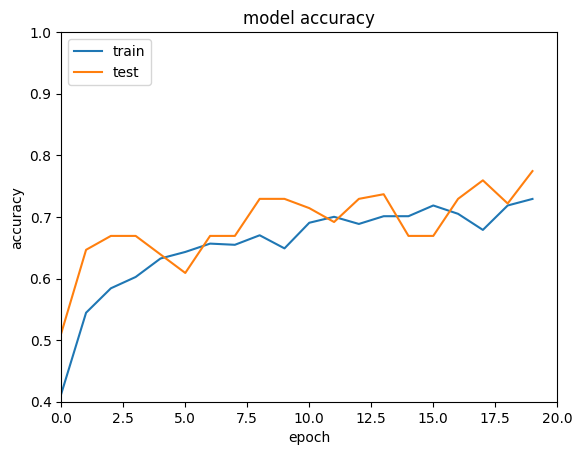

In [ ]:
# When initially figuring out the code, just run a few epochs so it will go fast
#  need to increase the number of epochs when I run the final model, as many as 100

NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

###SOLUTION TO ASSIGNMENT

###If you wanted you could have gone further and applied additional image augmentation techniques to the training Generator to have a better dataset for training. A possible solution could be:

In [ ]:
train_datagen = ImageDataGenerator(

    rescale=1./255,

    rotation_range=40,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'

)

In [ ]:
# This is the proposed model architecture in the solution of the homework assignment

model = tf.keras.models.Sequential([

   # Find the features with Convolutions and Pooling

   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),

   tf.keras.layers.MaxPooling2D(2, 2),

   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),

   tf.keras.layers.MaxPooling2D(2,2),

   # Flatten the results to feed into a DNN

   tf.keras.layers.Flatten(),

   # 512 neuron hidden layer

   tf.keras.layers.Dense(512, activation='relu'),

   tf.keras.layers.Dense(3, activation='softmax')

])

In [ ]:
OPTIMIZER = 'adam'

LOSS_FUNCTION = 'categorical_crossentropy'

In [ ]:
from tensorflow.keras.optimizers import RMSprop

OPTIMIZER = RMSprop(lr=0.0001)